In [1]:
# importing important modules
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image
import pandas as pd
import numpy as np

In [3]:
import os

In [2]:
import pandas as pd

In [4]:
os.chdir('..')

In [5]:
os.getcwd()

'c:\\Users\\user\\Downloads\\ten_academy\\week8\\Causal_Inference'

In [12]:
merged_df = pd.read_csv('data/ready_for_causal_inference.csv')

In [13]:
merged_df.head(1)

,id,Driver ID,Driver Action,Driver Lat,Driver Lon,Trip ID,Trip Start Time,Trip End Time,Trip Duration(minutes),Day of Week,...,Is Thunderstorm,Is Heavy Rain Shower,Is Light Rain,Is Rain,Is Overcast,Is Heavy Rain,Is Clear,Is Holiday,Is Weekend,Distance From Driver to Origin(km)
0,1,243828,1,6.602207,3.270465,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,3,...,1,0,0,0,0,0,0,0,0,0.693615


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504394 entries, 0 to 1504393
Data columns (total 32 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   id                                  1504394 non-null  int64  
 1   Driver ID                           1504394 non-null  int64  
 2   Driver Action                       1504394 non-null  int64  
 3   Driver Lat                          1504394 non-null  float64
 4   Driver Lon                          1504394 non-null  float64
 5   Trip ID                             1504394 non-null  int64  
 6   Trip Start Time                     1504394 non-null  object 
 7   Trip End Time                       1504394 non-null  object 
 8   Trip Duration(minutes)              1504394 non-null  float64
 9   Day of Week                         1504394 non-null  int64  
 10  Hour of Day                         1504394 non-null  int64  
 11  Origin Lat 

In [15]:
unwanted_cols = ['id','Trip ID','Driver ID','Driver Lat','Driver Lon','Trip Start Time',
                 'Trip End Time','Origin Lat','Origin Lon','Destination Lat','Destination Lon']
df_causal = merged_df.drop(columns=unwanted_cols)

In [16]:
df_causal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504394 entries, 0 to 1504393
Data columns (total 21 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Driver Action                       1504394 non-null  int64  
 1   Trip Duration(minutes)              1504394 non-null  float64
 2   Day of Week                         1504394 non-null  int64  
 3   Hour of Day                         1504394 non-null  int64  
 4   Trip Distance (km)                  1504394 non-null  float64
 5   Average Temperature(Celcius)        1504394 non-null  float64
 6   Wind Speed(km/h)                    1504394 non-null  float64
 7   Air Pressure(hPa)                   1504394 non-null  float64
 8   Is Cloudy                           1504394 non-null  int64  
 9   Is Fair                             1504394 non-null  int64  
 10  Is Fog                              1504394 non-null  int64  
 11  Is Thunders

In [19]:
df_causal['Average Speed'] = df_causal['Trip Distance (km)'] / (df_causal['Trip Duration(minutes)'] / 60)

In [21]:
df_causal.head(15)

,Driver Action,Trip Duration(minutes),Day of Week,Hour of Day,Trip Distance (km),Average Temperature(Celcius),Wind Speed(km/h),Air Pressure(hPa),Is Cloudy,Is Fair,...,Is Heavy Rain Shower,Is Light Rain,Is Rain,Is Overcast,Is Heavy Rain,Is Clear,Is Holiday,Is Weekend,Distance From Driver to Origin(km),Average Speed
0,1,3.616667,3,9,21.048262,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,0.693615,349.187758
1,0,3.616667,3,9,21.048262,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,1.554086,349.187758
2,0,3.616667,3,9,21.048262,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,0.788353,349.187758
3,0,3.616667,3,9,21.048262,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,0.694071,349.187758
4,0,3.616667,3,9,21.048262,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,1.623329,349.187758
5,0,3.616667,3,9,21.048262,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,1.513601,349.187758
6,0,3.616667,3,9,21.048262,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,1.532636,349.187758
7,0,3.616667,3,9,21.048262,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,1.024952,349.187758
8,0,3.616667,3,9,21.048262,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,1.102224,349.187758
9,0,3.616667,3,9,21.048262,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,1.876727,349.187758


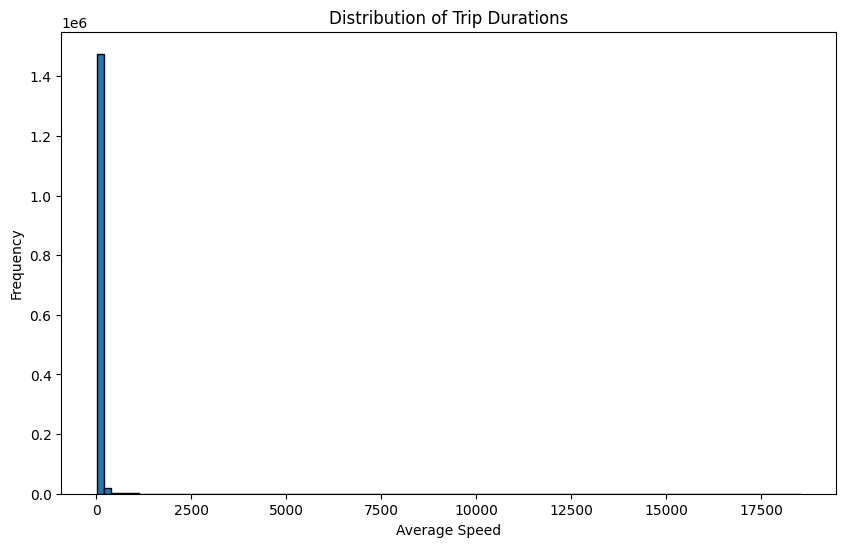

In [22]:
import matplotlib.pyplot as plt

# Distribution of Trip Durations
plt.figure(figsize=(10, 6))
plt.hist(df_causal['Average Speed'], bins=100, edgecolor='k')
plt.xlabel('Average Speed')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.show()

In [23]:
# Calculate the Interquartile Range (IQR)
Q1 = df_causal['Average Speed'].quantile(0.25)
Q3 = df_causal['Average Speed'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
completed_orders_no_outliers = df_causal[
    (df_causal['Average Speed'] >= lower_bound) &
    (df_causal['Average Speed'] <= upper_bound)
]

# Display the number of rows before and after removing outliers
rows_after_outlier_removal = len(completed_orders_no_outliers)

lower_bound, upper_bound, rows_after_outlier_removal


(-6.9623158794624205, 27.306452347827943, 1371070)

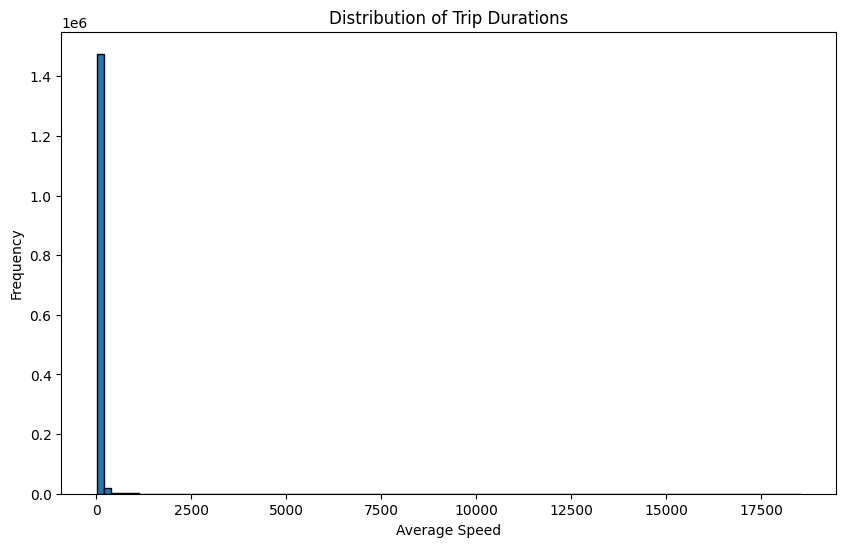

In [24]:
import matplotlib.pyplot as plt

# Distribution of Trip Durations
plt.figure(figsize=(10, 6))
plt.hist(df_causal['Average Speed'], bins=100, edgecolor='k')
plt.xlabel('Average Speed')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.show()

In [17]:
from sklearn.preprocessing import Normalizer
import warnings 
warnings.filterwarnings("ignore")

In [18]:
def normalizer(df,columns) -> pd.DataFrame:
    """
    Returns dataframe with normalized columns
    """
    nrm = Normalizer()
    df_norm = df.copy(deep=True)
    df_norm[columns] = pd.DataFrame(
        nrm.fit_transform( df_norm[columns]), columns=columns
    )
    return df_norm

In [25]:
df_causal_norm = normalizer(df_causal,columns=['Trip Distance (km)','Trip Duration(minutes)','Average Speed','Distance From Driver to Origin(km)'])

In [27]:
df_causal.head()

,Driver Action,Trip Duration(minutes),Day of Week,Hour of Day,Trip Distance (km),Average Temperature(Celcius),Wind Speed(km/h),Air Pressure(hPa),Is Cloudy,Is Fair,...,Is Heavy Rain Shower,Is Light Rain,Is Rain,Is Overcast,Is Heavy Rain,Is Clear,Is Holiday,Is Weekend,Distance From Driver to Origin(km),Average Speed
0,1,3.616667,3,9,21.048262,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,0.693615,349.187758
1,0,3.616667,3,9,21.048262,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,1.554086,349.187758
2,0,3.616667,3,9,21.048262,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,0.788353,349.187758
3,0,3.616667,3,9,21.048262,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,0.694071,349.187758
4,0,3.616667,3,9,21.048262,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,1.623329,349.187758


In [26]:
df_causal_norm.head()

,Driver Action,Trip Duration(minutes),Day of Week,Hour of Day,Trip Distance (km),Average Temperature(Celcius),Wind Speed(km/h),Air Pressure(hPa),Is Cloudy,Is Fair,...,Is Heavy Rain Shower,Is Light Rain,Is Rain,Is Overcast,Is Heavy Rain,Is Clear,Is Holiday,Is Weekend,Distance From Driver to Origin(km),Average Speed
0,1,0.010338,3,9,0.060165,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,0.001983,0.998133
1,0,0.010338,3,9,0.060165,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,0.004442,0.998125
2,0,0.010338,3,9,0.060165,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,0.002253,0.998132
3,0,0.010338,3,9,0.060165,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,0.001984,0.998133
4,0,0.010338,3,9,0.060165,28.8,7.6,1016.9,0,0,...,0,0,0,0,0,0,0,0,0.004640,0.998124


In [29]:
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas

structural_model = StructureModel()

In [30]:

structural_model = from_pandas(df_causal_norm)
structural_model.edges

In [ ]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

viz = plot_structure(
    structural_model,
    graph_attributes={"scale": "2"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    
)
Image(viz.draw(format='png'))